# Example - 43 - Ice Giant Pre-Decadal - Uranus Probe (Concept)

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
import numpy as np
import matplotlib.pyplot as plt

This notebook simulates the atmospheric entry of the Uranus entry probe described in Sec. A.5.3 of the Ice Giants Pre-Decadal Mission Study. https://www.lpi.usra.edu/icegiants/mission_study/Full-Report.pdf

In [3]:
# Set up the planet and atmosphere model.
planet=Planet("URANUS")  
planet.h_skip = 1015.0E3
planet.h_trap = -100.0E3
planet.loadAtmosphereModel('../atmdata/Uranus/uranus-ames.dat', 0 , 1 , 2, 3)

In [4]:
# Set up the vehicle
vehicle1=Vehicle('igpd-uranus', 325.0, 205.0, 0.0, np.pi*1.2**2.0*0.25, 0.0, 0.20, planet)

In [5]:
# Set up entry parameters
vehicle1.setInitialState(1015.0,0.0,0.0,23.10,0.0,-30.0,0.0,0.0)

In [6]:
# Set up solver
vehicle1.setSolverParams(1E-6)

In [7]:
# Propogate vehicle entry trajectory
vehicle1.propogateEntry (120*60.0,0.1,0.0)

In [8]:
# import rcParams to set figure font type
from matplotlib import rcParams

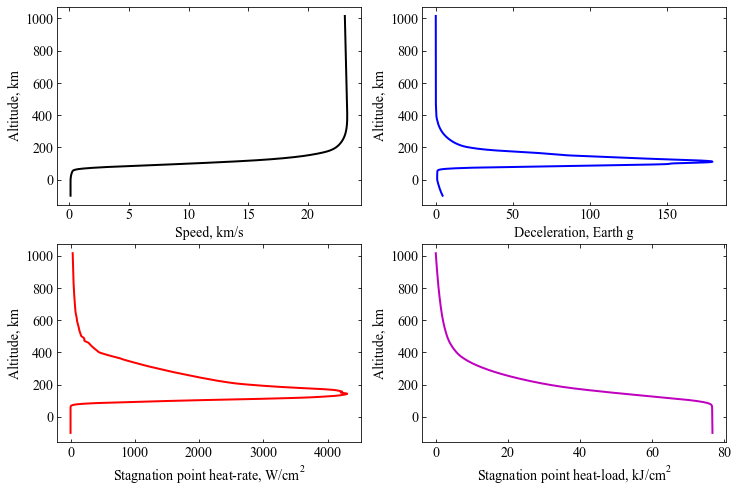

In [9]:
fig = plt.figure(figsize=(12,8))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

plt.subplot(2, 2, 1)
plt.plot(vehicle1.v_kmsc, vehicle1.h_kmc, 'k-', linewidth=2.0)

plt.xlabel('Speed, km/s',fontsize=14)
plt.ylabel('Altitude, km', fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

plt.subplot(2, 2, 2)
plt.plot(vehicle1.acc_net_g, vehicle1.h_kmc, 'b-', linewidth=2.0)
plt.xlabel('Deceleration, Earth g',fontsize=14)
plt.ylabel('Altitude, km', fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

plt.subplot(2, 2, 3)
plt.plot(vehicle1.q_stag_total, vehicle1.h_kmc,'r-', linewidth=2.0)
plt.xlabel('Stagnation point heat-rate, '+r'$W/cm^2$',fontsize=14)
plt.ylabel('Altitude, km', fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)


plt.subplot(2, 2, 4)
plt.plot(vehicle1.heatload/1.0E3, vehicle1.h_kmc, 'm-', linewidth=2.0)
plt.xlabel('Stagnation point heat-load, '+r'$kJ/cm^2$',fontsize=14)
plt.ylabel('Altitude, km', fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

plt.savefig('../plots/igpd-uranus.png',bbox_inches='tight')
plt.savefig('../plots/igpd-uranus.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/igpd-uranus.eps', dpi=300,bbox_inches='tight')

plt.show()

Discrepancies are attributed to initial state being not properly converted to planet-relative frame, and different heating relations used in the studies.